<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418/22.518 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# **PAC 4. Redes Neuronales**

## Introducción

En este ejercicio práctico estudiaremos cómo utilizar las técnicas previamente estudiadas en teoría para la resolución de pueblos prácticos.

Las competencias asociadas a este módulo son las siguientes:

- Que los estudiantes sepan aplicar sus conocimientos a su trabajo o vocación de una forma profesional y posean las competencias que suelen demostrarse por medio de la elaboración y defensa de argumentos y la resolución de problemas dentro de su área de estudio.
- Diseñar y construir aplicaciones analíticas mediante técnicas de desarrollo, integración y reutilización de componentes software.
- Buscar, gestionar y utilizar la información más adecuada para modelizar problemas concretos y aplicar adecuadamente procedimientos teóricos para su resolución de forma autónoma y creativa.

Y los objetivos que perseguimos con este notebook de prácticas son:

- Conocer las distintas partes que forman una red neuronal así como las técnicas de entrenamiento de las mismas.
- Realizar un análisis de los resultados obtenidos con diversas arquitecturas de redes neuronales en problemas de clasificación utilizando las métricas de evaluación comunes para estos problemas.
- Familiarización con librerías de programación de redes neuronales a través de ejemplos.
- Detectar qué tipo de red es la más indicada para un problema concreto. Una vez detectada, implementar la arquitectura usando librerías de aprendizaje profundo.

## Descripción de la PEC

Para ello, en este notebook deberá realizar:

1. Cargar un dataset, analizarlo y prepararlo para entrenar modelos de deep learning.

2. Entrenar una red neuronal de cero y luego con la estrategia de transfer learning por un caso binario.

4. Probar varias configuraciones de entrenamiento.

5. Reflexionar sobre los resultados obtenidos.


Los ejercicios se valorarán de la siguiente forma:

     Ejercicio 1: 2 puntos
     Ejercicio 2: 2 puntos
     Ejercicio 3: 2 puntos
     Ejercicio 4: 2 puntos
     Ejercicio 5: 2 puntos

Cada ejercicio será evaluado teniendo en cuenta tanto la corrección técnica de la solución como la justificación y argumentación del procedimiento y resultados.

Cada ejercicio está dividido en distintos apartados (a, b, c,…). Esta división tiene el objetivo de guiarle en la resolución de la práctica y debe solucionar cada apartado, proporcionando el código y las explicaciones requeridas. Sin embargo, estos apartados no se evaluarán individualmente. Cada ejercicio será evaluado de forma global, por lo que no existe una puntuación específica para cada apartado.


### Clasificación de imágenes

En el campo de la visión por computador existen diferentes tareas que podemos realizar para analizar una imagen. Algunas de estas tareas se muestran en la siguiente figura:

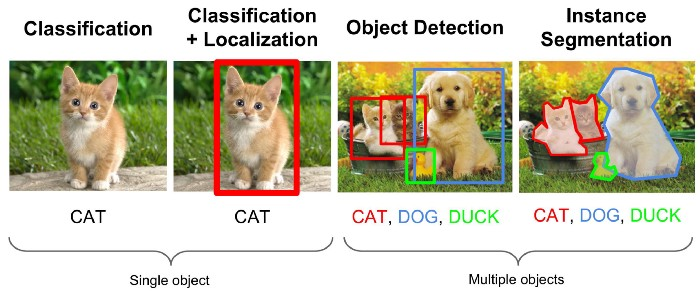

<div style="font-size:3">Fuente de la imagen: https://medium.com/@sidereal/all-you-need-to-know-about-computer-vision-3997bc6318a6 </div>



#### Tiempo de entrenamiento

Tened en cuenta que entrenar una red neuronal consume mucho tiempo. Si utilizáis Colab podrá utilizar las GPU de Google de modo que el tiempo de entrenamiento se reducirá significativamente respecto a un entrenamiento sobre CPU. Ahora bien... no esperéis milagros. Aunque el término "GPU de Google" sugiere mucha capacidad de proceso, no es tanta como parece.

Por todos estos motivos los ejercicios propuesto se centran en redes neuronales simples y en entrenamientos pequeños (solo unas pocas épocas o epochs*). Estos entrenamientos pequeños sobre redes neuronales sencillas no os permitirán ver todo el potencial del deep leraning pero sí os darán algunas pistas sobre cómo funcionan las redes neuronales, así como sus ventajas e inconvenientes. Si, una vez terminada la práctica, deseáis repetir todos los entrenamientos durante más épocas (entre 100 y 200 por ejemplo) o deseáis intentar ampliar los modelos sencillos con los que ha trabajado, puede hacerlo (sin que forme parte de la práctica en entregar).

Algunos ejercicios requieren funciones, variables o modelos creados y entrenados en ejercicios anteriores. Si abandonáis la sesión (tanto el local como remotamente con Colab) para continuar más adelante, tendréis que volver a ejecutar todas las celdas. Esto no es problemático salvo para los entrenamientos (ya que tardan tiempo en completarse). Ya que se os pedirá que guardéis modelos entrenados a disco, nuestro consejo es que comprobéis (en vuestro código) si el modelo a entrenar ya existe en el disco y, si es así, lo podéis cargar en lugar de volverlo a entrenar. Podéis hacerlo aunque el ejercicio no lo solicite expresamente.

En relación a lo anterior, recuerdad que los archivos del espacio Colab se pierden al cerrar la sesión. Esto incluye los modelos entrenados que habéis guardado. Para preservarlos podéis utilizar las técnicas mencionadas anteriormente.

**IMPORTANTE:** Cuando trabajamos con la librería de deep learning `keras` debemos asegurarnos de que estamos utilizando una instancia de Colab de tipo "GPU". Si no el entrenamiento de nuestras redes será hasta 10 veces más lento.

Para cambiar el tipo de instancia de Colab vaya al menú superior "Runtime" -> "Change Runtime Type" -> "GPU".

In [ ]:
print('Check GPU runtime type... ')
if len(tf.config.list_physical_devices('GPU')) == 0:
  print('Change Runtype Type in top menu for GPU acceleration')
else:
  print('OK!')

## EJERCICIO 1:  Exploración y Preprocesamiento de Datos (2 puntos)


En este ejercicio utilizaremos el dataset:

https://www.kaggle.com/datasets/bmadushanirodrigo/fracture-multi-region-x-ray-data?select=Bone_Fracture_Binary_Classification

Si no tenéis acceso probad con este link:
https://drive.google.com/drive/u/1/folders/1k5lJWaorlJpVrr7FLMuZPpLTzelP5Pru

### **1a. Carga y análisis de los datos**

**Describe los datos. Utiliza las funciones que necesites para:**


**a) Cuenta el número de archivos en cada conjunto (train/val/test) y cada categoría (fractured/not fractured)**

In [ ]:
# Respuesta:



**b) Visualiza 5 ejemplos de imágenes con fracturas y 5 ejemplos de imágenes sin fracturas. Compara también las dimensiones y el rango de valores de píxeles de cada imagen.**

In [ ]:
# Respuesta


**c) ¿Qué problema podría surgir si las dimensiones de las imágenes de entrada son diferentes para el modelo? ¿Cómo puedes solucionar este problema antes de entrenar el modelo?**


Tu respuesta:

> **<font color="#A94442">Antes de continuar:</font>**

> <font color="#A94442">Se han detectado imágenes corruptas con los siguientes nombres en las carpetas de not fractured de los conjuntos de train, val y test. Estas imágenes deben eliminarse de manera consistente de todos los conjuntos de datos para evitar problemas durante el entrenamiento del modelo.</font>

> <font color="#A94442">Lista de imágenes corruptas:</font>

> <font color="#A94442">IMG0004134.jpg IMG0004143.jpg
IMG0004148.jpg
IMG0004149.jpg
IMG0004308.jpg
IMG0004347.jpg</font>

> <font color="#A94442">Por favor, eliminar las imágenes con esos nombres en el subconjunto de not fractured dentro de las carpetas train, val y test.</font>

### **1b. Preprocesamiento:**

Cargar -> Redimensionar -> Augmentación -> Normalización -> Modelo


**a) Cargar todas las imágenes usando *`image_dataset_from_directory`*, redimensionar las imágenes a *`128x128`* y cambia las etiquetas de fractura y no fractura a `formato binario`**



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Utiliza estos parámetros de entrada:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# label_mode="int

# **Rutas del dataset**
train_dir = "/content/drive/MyDrive/tmp/datasets/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train"
test_dir = "/content/drive/MyDrive/tmp/datasets/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test"
val_dir = "/content/drive/MyDrive/tmp/datasets/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val"



In [ ]:
#Tu respuesta:



**a.1) Muestra los nombres de las clases y su 'label (0 o 1)' asociado:**

In [ ]:
# Tu respuesta



En TensorFlow, el formato de las etiquetas generadas por `image_dataset_from_directory` ya se genera automáticamente como números enteros (0, 1, 2, ... dependiendo del número de clases) según el orden alfabético de las carpetas. Por defecto, asigna:

*   0 a 'fractured' (porque aparece primero alfabéticamente).
*   1 a 'not fractured'.

Para facilitar la interpretación y mantener la lógica en el contexto médico **(donde 1 = fractura y 0 = no fractura)**, es importante invertir estas etiquetas.

Desafortunadamente, `image_dataset_from_directory` no permite directamente invertir el orden de las etiquetas. **Invierte las etiquetas manualmente para que 'fractured' sea 1 y 'not fractured' sea 0**.

In [ ]:
# Tu respuesta


**b) Visualiza 5 imágenes del train junto con su clase.**

In [ ]:
# Tu respuesta



**c) Convertir las imágenes a escala de grises**

In [ ]:
# Tu respuesta

**d) Aplicar augmentación de datos**
*   NO debes aplicar estas técnicas de augmentación directamente al dataset original, ya que no usaremos el dataset augmentado para la evaluación.
*   Crea un nuevo dataset con los datos aumentados a partir del conjunto de entrenamiento.

Esta técnica genera nuevas imágenes a partir de las existentes, introduciendo pequeñas variaciones como rotaciones, flips y cambios de brillo.


1.   Implementa técnicas de augmentación de imágenes usando las siguientes transformaciones:

> *   `Rotación aleatoria (RandomRotation):` Introduce pequeñas rotaciones en las imágenes.
*   `Flips horizontales (RandomFlip):` Invierte las imágenes horizontalmente.
*   `Ajuste de brillo (RandomBrightness):` Modifica el brillo para simular diferentes condiciones de luz.

2.   Aplica estas transformaciones solo en el conjunto de entrenamiento y visualiza un conjunto de imágenes augmentadas.

In [ ]:
#Tu respuesta:






**d.1) ¿Por qué crees que es importante aplicar técnicas de augmentación?**

Tu respuesta:


**d.2) ¿Qué efectos podría tener la aplicación de zoom en las imágenes durante la augmentación de datos en este contexto? Explica cómo podría influir en la detección de fracturas y justifica tu respuesta.**

Tu respuesta:


**e) Normaliza los valores de píxeles.**

Escalar los valores de píxeles a un rango específico, generalmente [0, 1] o [-1, 1].



1.   Escala los valores de píxeles a un rango de [0, 1] utilizando una capa de normalización.
2.   Aplica la normalización tanto al conjunto de entrenamiento (después de la augmentación) como a los conjuntos de validación y prueba.

In [ ]:
# Tu respuesta

**e.1) ¿Por qué es importante la normalización?**



Tu respuesta:


**f) Cambiar proporciones (70%-20%-10%) y reducir el dataset**

Aunque las subcarpetas ya están separadas, vamos a reducir el dataset total que utilizaremos a 2000 muestras (para no tener problemas de recursos ni durante el entrenamiento) y cambiaremos los tamaños de los conjuntos para que cumplan con las proporciones indicadas. Ejecuta este código y sigue con el resto de ejercicios:



In [ ]:
# Original dataset counts
train_fractured = 4606
train_not_fractured = 4634
val_fractured = 337
val_not_fractured = 486
test_fractured = 238
test_not_fractured = 262

# Total counts for each set
total_train = train_fractured + train_not_fractured
total_val = val_fractured + val_not_fractured
total_test = test_fractured + test_not_fractured

# Subset parameters
subset_total = 2000
subset_fraction_train = 0.7  # 70% training
subset_fraction_val = 0.2    # 20% validation
subset_fraction_test = 0.1   # 10% testing

# Calculate the target sizes for each subset
train_size = int(subset_total * subset_fraction_train)
val_size = int(subset_total * subset_fraction_val)
test_size = int(subset_total * subset_fraction_test)

# Calculate SUBSET_FRACTION for each dataset
SUBSET_FRACTION_TRAIN = train_size / total_train
SUBSET_FRACTION_VAL = val_size / total_val
SUBSET_FRACTION_TEST = test_size / total_test

# Apply subset_fraction to reduce the dataset sizes
subset_size_train = int(tf.data.experimental.cardinality(train_dataset).numpy() * SUBSET_FRACTION_TRAIN)
subset_size_val = int(tf.data.experimental.cardinality(valid_dataset).numpy() * SUBSET_FRACTION_VAL)
subset_size_test = int(tf.data.experimental.cardinality(test_dataset).numpy() * SUBSET_FRACTION_TEST)

# Reduce datasets
train_dataset_reduced = train_dataset.take(subset_size_train)
valid_dataset_reduced = valid_dataset.take(subset_size_val)
test_dataset_reduced = test_dataset.take(subset_size_test)

# Print subset sizes
print(f"Train subset size: {subset_size_train} samples")
print(f"Validation subset size: {subset_size_val} samples")
print(f"Test subset size: {subset_size_test} samples")

Train subset size: 43 samples
Validation subset size: 12 samples
Test subset size: 6 samples


# EJERCICIO 2: Construcción de una CNN desde Cero (2 puntos)

2.1) Comienza construyendo un modelo secuencial que conste de **dos bloques** de `Conv2D` y `MaxPooling2D`, seguidos de una **capa densa**. El modelo debe tener una capa de salida con una **sola neurona** y activación `sigmoid` para clasificación binaria. *No entrenes el modelo*

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')



In [ ]:
#Definición arquitectura


2.2) ¿Por qué la activación sigmoid es adecuada para la capa de salida en una tarea de clasificación binaria?

Tu respuesta:

2.3) Añade `Dropout` del 50% después de la capa densa. Usa `kernel_regularizer='l2'` en cada capa convolucional. Usa `Batch Normalization` después de cada capa convolucional.

In [ ]:
# Tu codigo


2.4) ¿Qué efectos tiene el uso de `Dropout` en el entrenamiento de la red?

Tu respuesta:

2.5) ¿Cómo mejora la normalización de lotes (`Batch Normalization`) el entrenamiento del modelo?

Tu respuesta:

### **2.6) Entrenamiento del Modelo**

2.6.1) Compila el modelo usando el optimizador `Adam`, con un learning_rate=learning_rate=0.001 y la función de pérdida binary_crossentropy.

In [ ]:
# Tu respuesta


2.6.2) ¿Cuál es la diferencia entre los optimizadores SGD y Adam y cuál elegirías para este caso?

Tu respuesta:


2.6.3) ¿Qué es `EarlyStopping` y cómo ayuda a evitar el sobreajuste?

Tu respuesta:

2.6.4) Entrena el modelo con un máximo de `35 épocas`, un `BATCH_SIZE=32` y utiliza el callback `EarlyStopping` para evitar el sobreajuste, observando la `val_loss`.

In [ ]:

if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is not available")

GPU is available


In [ ]:
# Tu código:



2.6.5) Evalúa el modelo final usando el conjunto de prueba (test) y obtén la precisión. ¿Qué significa el resultado de la precisión del conjunto de test?

In [ ]:
# Tu respuesta

Tu respuesta:

2.6.6) Haz una función para realizar las gráficas de la evolución de la loss y la accuracy en cada batch. Debe tener la cabecera:


```
def plot_loss_and_accuracy(history):
```

donde history es la salida de la función model.fit utilizada para entrenar el modelo.


Utiliza la función para hacer el plote del modelo entrenado

In [ ]:
# Tu respuesta

2.6.7) ¿Cómo interpretas el gráfico?

Tu respuesta:

## EJERCICIO 3: Transfer Learning (2 puntos)


En este ejercicio, implementarás un modelo utilizando Transfer Learning con la arquitectura preentrenada EfficientNetB0 para clasificación binaria.

3.1.) Entrenamiento inicial:
*   Usa EfficientNetB0 preentrenado con pesos de ImageNet y elimina la capa superior (include_top=False).
*   Agrega una cabeza personalizada con una capa de GlobalAveragePooling2D, seguida de Dropout y una capa de salida con sigmoide.
*   Congela las capas del modelo base, pero descongela las últimas 3 capas y entrena el modelo utilizando los datos de entrenamiento y validación.
* Usa Adam y epochs=10.

In [ ]:
# Tu respuesta

3.2.) Fine-tuning:
*   Descongela las capas del modelo base y realiza un nuevo entrenamiento con una tasa de aprendizaje baja (0.0001).
* Usa Adam y epochs 15.

In [ ]:
# Tu respuesta

In [ ]:
# Recuerda guardarlo: model.save('mi_modelo.h5')

3.3.) Evalúa el **modelo** usando el conjunto de prueba y obtén la precisión. ¿Qué significa el resultado de la precisión del conjunto de test?

In [ ]:
# Tu respuesta

Tu respuesta:

3.4.) ¿Qué diferencias observas entre el modelo entrenado desde cero y el modelo usando transferencia de aprendizaje? ¿Por qué es probable que el modelo con transferencia de aprendizaje haya tenido un mejor rendimiento?

Respuesta:


## EJERCICIO 4: Explicabilidad con Grad-CAM (2 puntos)


4.1.)  Evalúa el modelo: Analiza 9 imágenes donde el modelo falló. ¿Son las imágenes mal clasificadas similares entre sí? ¿Existen características específicas que el modelo no haya aprendido correctamente? ¿Están mal clasificadas las imágenes más complejas o con mucho ruido?

In [ ]:
# Tú codigo:



Tu respuesta:

4.2.) Introduce métodos de explicabilidad como Grad-CAM:
Visualiza las áreas en las imágenes donde el modelo se enfoca para hacer sus predicciones.
Reflexiona:
¿Cómo mejorarías el modelo o el dataset?
*   Usa esta imagen: Bone_Fracture_Binary_Classification/test/fractured/91-rotated1-rotated1-rotated1.jp
*   Visualiza las áreas en las imágenes donde el modelo se enfoca para hacer sus predicciones con Grad-CAM
*   ¿Qué conclusión podemos sacar?


In [ ]:
# Tu respuesta

Tu respuesta:

## Ejercicio 5: Modelo Multimodal (2 puntos)


En el ámbito de la salud, muchas veces tenemos que trabajar con datos provenientes de diferentes fuentes y en distintos formatos. Por ejemplo, podemos tener imágenes médicas, como rayos X, junto con información tabular sobre el paciente, como su edad, sexo, historial médico, etc. Integrar estas diversas fuentes de información puede mejorar significativamente el rendimiento de los modelos predictivos.

En este ejercicio, vamos a trabajar con imágenes de rayos X de fracturas óseas y combinar esta información visual con datos tabulares simulados (edad y sexo del paciente).

5.1.) **Generar datos tabulares simulados:** Como no tenemos datos tabulares reales disponibles, vamos a generar datos sintéticos para la edad y el sexo de los pacientes. Este es un paso común cuando no contamos con datos adicionales, y nos permitirá simular cómo la combinación de datos tabulares y visuales podría mejorar el rendimiento.

*   Utiliza el siguiente código para generar los datos tabulares simulados:

In [ ]:
import numpy as np

# Número de muestras
num_samples = len(train_dataset) * BATCH_SIZE  # Ajusta al tamaño real de tu dataset

# Crear datos sintéticos para edad y sexo
train_tabular = np.random.randint(18, 80, size=(num_samples, 1))  # Edad entre 18 y 80 años
train_sex = np.random.randint(0, 2, size=(num_samples, 1))  # Sexo: 0 (femenino), 1 (masculino)
train_tabular_data = np.hstack((train_tabular, train_sex))  # Combinar en una matriz (edad, sexo)

# Crear etiquetas sintéticas (si es necesario para pruebas rápidas)
train_labels = np.random.randint(0, 2, size=(num_samples, 1))  # 0 o 1


5.2.) **Diseñar un modelo multimodal:** Debes crear un modelo que combine las imágenes con los datos tabulares. Utiliza una red neuronal para procesar las imágenes y luego concatena la salida de esa red con los datos tabulares antes de pasar por las capas densas finales.

La estructura del modelo será la siguiente:

*   Una entrada para las imágenes.
*   Una red CNN para procesar las imágenes.
*   Una entrada para los datos tabulares (edad y sexo).
*   Las salidas de ambas ramas deben combinarse antes de pasar a las capas de clasificación finales.

Utiliza el siguiente código como guía para crear el modelo multimodal:

In [ ]:
model = models.Sequential([
    layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
#Tú codigo:

5.3.) ¿Cómo decidirías qué entradas (imágenes/tabular) tienen mayor peso en las predicciones?

Tu respuesta:

5.4.) ¿Qué impacto tiene la calidad de los datos tabulares en la precisión del modelo combinado?

Tu respuesta: